<a href="https://colab.research.google.com/github/zackives/upenn-cis-2450/blob/main/15_Module_3_Notebook_III_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning and Decision Trees

Let's consider **supervised** machine learning, which learns a function from input features to output classes.

## Autograder setup

In [27]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 99999999 # YOUR PENN-ID GOES HERE AS AN INTEGER##PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO

In [28]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [29]:
%set_env HW_ID=cis2450_fall24_HW9

env: HW_ID=cis2450_fall24_HW9


In [30]:
!pip3 install penngrader-client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 3.8 MB/s eta 0:00:00


In [31]:
import os
from penngrader.grader import *

grader = PennGrader('notebook-config.yaml', os.environ['HW_ID'], STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 99999999

Make sure this correct or we will not be able to store your grade


## The Wine Dataset

Let's take a look at the *wine* dataset.

In [32]:
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_wine

dataset = load_wine()
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Let's look at this as a dataframe

In [33]:
import pandas as pd
wine_arr = dataset.data

wine_df = pd.DataFrame(wine_arr, columns=dataset.feature_names)
wine_df['class'] = dataset.target

wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


<Axes: >

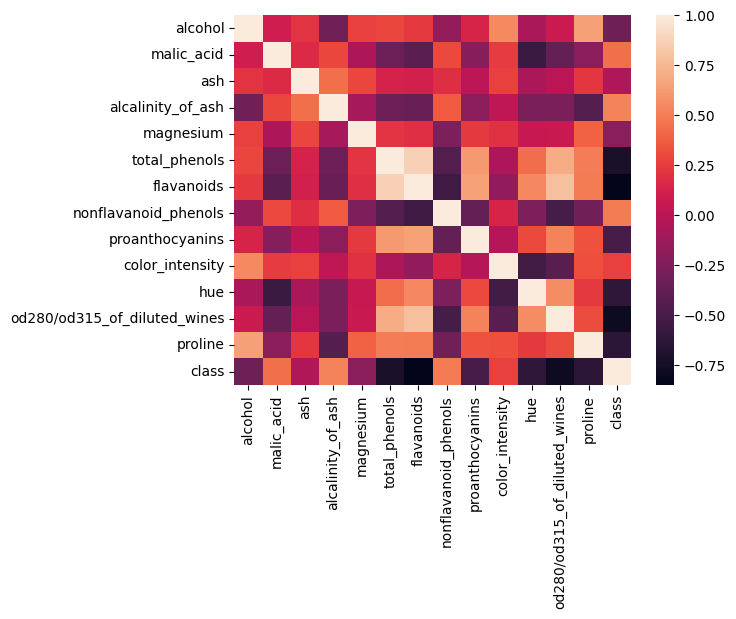

In [34]:
import seaborn as sns

corr = wine_df.corr()

sns.heatmap(corr)


## Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = wine_df.drop(columns=['class'])
y = wine_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

What does it look like?

[Text(0.5, 0.9, 'x[9] <= 3.82\ngini = 0.659\nsamples = 142\nvalue = [45, 57, 40]'),
 Text(0.3, 0.7, 'x[12] <= 1002.5\ngini = 0.109\nsamples = 52\nvalue = [3, 49, 0]'),
 Text(0.4, 0.8, 'True  '),
 Text(0.2, 0.5, 'x[2] <= 3.07\ngini = 0.039\nsamples = 50\nvalue = [1, 49, 0]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 49\nvalue = [0, 49, 0]'),
 Text(0.3, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.7, 0.7, 'x[6] <= 1.4\ngini = 0.577\nsamples = 90\nvalue = [42, 8, 40]'),
 Text(0.6, 0.8, '  False'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(0.8, 0.5, 'x[12] <= 724.5\ngini = 0.269\nsamples = 50\nvalue = [42, 8, 0]'),
 Text(0.7, 0.3, 'x[0] <= 13.145\ngini = 0.198\nsamples = 9\nvalue = [1, 8, 0]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]')]

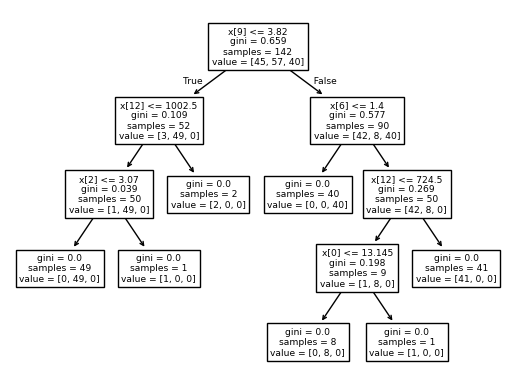

In [36]:
from sklearn import tree

tree.plot_tree(clf)

In [37]:
clf.score(X_test, y_test)

0.9444444444444444

What happens if we apply the `StandardScaler` first?  We said that Decision Trees are *scale-invariant*.

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_scaled = DecisionTreeClassifier()
clf_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [39]:
clf_scaled.score(X_test_scaled, y_test)

0.9444444444444444

The same!


## Exercise

An issue with Decision Trees is that, when they fully fit the training data, they may not *generalize* to slightly different data. A common approach is to limit the decision tree to a `max_depth`. Try `max_depth` values until you find the best one.

In [ ]:
# TODO: search for best max depth

In [41]:
best_max_depth = # TODO

In [ ]:
grader.grade('dectree', best_max_depth)